# IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [1]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet, stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
import plotly.express as px

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# FOR REPRODUCIBILITY
SEED = 101  
tf.keras.backend.clear_session()      # CLEAR OUT JUNK FROM A PREVIOUS KERAS SESSION
tf.random.set_seed(SEED)
np.random.seed(SEED)

In [3]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# install nltk
# NLTK: Natural Language tool kit
# !pip install nltk

In [5]:
# install gensim
# Gensim is an open-source library for unsupervised topic modeling and natural language processing
# Gensim is implemented in Python and Cython.
# !pip install gensim

In [6]:
# load the stock news data
stock_df = pd.read_csv("/content/drive/My Drive/Data_finance/stock_sentiment.csv")
stock_df.head()

Text  Sentiment
0  Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1
1  user: AAP MOVIE. 55% return for the FEA/GEED i...          1
2  user I'd be afraid to short AMZN - they are lo...          1
3                                  MNTA Over 12.00            1
4                                   OI  Over 21.37            1

In [7]:
# dataframe information
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [8]:
# check for null values
stock_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [9]:
stock_df['Sentiment'].nunique()

2

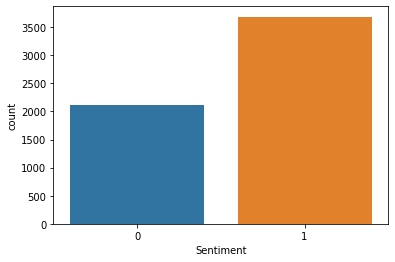

In [10]:
sns.countplot(data = stock_df, x = 'Sentiment')

# DATA PREPROCESSING



In [11]:
import string
import re
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
# Let's define a function to remove punctuations
def remove_punc(text):
  remove_regex = f'[{re.escape(string.punctuation)}]' 
  return re.sub(remove_regex, '', text)

In [13]:
# Let's remove punctuations from our dataset 
stock_df['Text_without_punctuation'] = stock_df['Text'].apply(remove_punc)

In [14]:
stock_df

Text  ...                           Text_without_punctuation
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...  ...  Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1     user: AAP MOVIE. 55% return for the FEA/GEED i...  ...  user AAP MOVIE 55 return for the FEAGEED indic...
2     user I'd be afraid to short AMZN - they are lo...  ...  user Id be afraid to short AMZN  they are look...
3                                     MNTA Over 12.00    ...                                   MNTA Over 1200  
4                                      OI  Over 21.37    ...                                    OI  Over 2137  
...                                                 ...  ...                                                ...
5786  Industry body CII said #discoms are likely to ...  ...  Industry body CII said discoms are likely to s...
5787  #Gold prices slip below Rs 46,000 as #investor...  ...  Gold prices slip below Rs 46000 as investors b...
5788  Workers at Bajaj Auto have agreed to a 10% wag...  ...  Workers at Bajaj Auto have agreed to a 10 wage...
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...  ...  Sharemarket LIVE Sensex off day’s high up 600 ...
5790  #Sensex, #Nifty climb off day's highs, still u...  ...  Sensex Nifty climb off days highs still up 2 K...

[5791 rows x 3 columns]

Next, let's remove stopwords from our data

In [15]:
# download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
stop_words = stopwords.words('english')

In [18]:
# Remove stopwords and also short words (less than 2 characters)
def preprocess(text):
  return [token for token in gensim.utils.simple_preprocess(text) if token not in stop_words and len(token) >= 2]

In [19]:
# apply pre-processing to the text column
stock_df['Text_without_punc_and_stopwords'] = stock_df['Text_without_punctuation'].apply(preprocess)

In [20]:
# join the words into a string
# stock_df['Processed Text 2'] = stock_df['Processed Text 2'].apply(lambda x: " ".join(x))

In [21]:
stock_df

Text  ...                    Text_without_punc_and_stopwords
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...  ...  [kickers, watchlist, xide, tit, soq, pnk, cpw,...
1     user: AAP MOVIE. 55% return for the FEA/GEED i...  ...  [user, aap, movie, return, feageed, indicator,...
2     user I'd be afraid to short AMZN - they are lo...  ...  [user, id, afraid, short, amzn, looking, like,...
3                                     MNTA Over 12.00    ...                                             [mnta]
4                                      OI  Over 21.37    ...                                               [oi]
...                                                 ...  ...                                                ...
5786  Industry body CII said #discoms are likely to ...  ...  [industry, body, cii, said, discoms, likely, s...
5787  #Gold prices slip below Rs 46,000 as #investor...  ...  [gold, prices, slip, rs, investors, book, prof...
5788  Workers at Bajaj Auto have agreed to a 10% wag...  ...  [workers, bajaj, auto, agreed, wage, cut, peri...
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...  ...  [sharemarket, live, sensex, day, high, points,...
5790  #Sensex, #Nifty climb off day's highs, still u...  ...  [sensex, nifty, climb, days, highs, still, key...

[5791 rows x 4 columns]

In [22]:
stock_df['Processesed_text_joined'] = stock_df['Text_without_punc_and_stopwords'].apply(lambda x : ' '.join(x))

In [23]:
stock_df.head()

Text  ...                            Processesed_text_joined
0  Kickers on my watchlist XIDE TIT SOQ PNK CPW B...  ...  kickers watchlist xide tit soq pnk cpw bpz aj ...
1  user: AAP MOVIE. 55% return for the FEA/GEED i...  ...  user aap movie return feageed indicator trades...
2  user I'd be afraid to short AMZN - they are lo...  ...  user id afraid short amzn looking like nearmon...
3                                  MNTA Over 12.00    ...                                               mnta
4                                   OI  Over 21.37    ...                                                 oi

[5 rows x 5 columns]

Let's visualize the wordcloud which can be very helpful in finding words associated with a positive/negative sentiment.

In [24]:
plt.figure(figsize=(40,20))
wc = WordCloud(max_words=1000, width = 1600, height = 800).generate(' '.join(stock_df.loc[stock_df['Sentiment'] == 0, 'Processesed_text_joined']))

<Figure size 2880x1440 with 0 Axes>

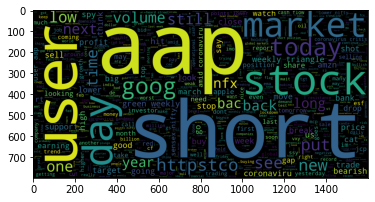

In [25]:
plt.imshow(wc)

There are words like 'aap', 'day', 'https', etc - which occur quite frequently but aren't really important. So, its better to extend the list of stopwords including such words. Importantly, the word short which is conventinally used for the shorting of stock shows a negative sentiment.

In [26]:
plt.figure(figsize=(40,20))
wc1 = WordCloud(max_words=1000, width = 1600, height = 800).generate(' '.join(stock_df.loc[stock_df['Sentiment'] == 1, 'Processesed_text_joined']))

<Figure size 2880x1440 with 0 Axes>

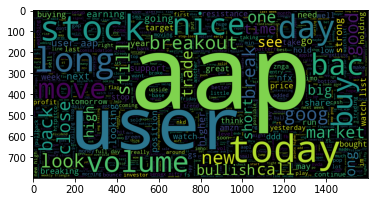

In [27]:
plt.imshow(wc1)

Again, words like 'aap', 'user', etc are occuring frequqently but dont mean much. Let's proceed to extend the stopwords vocabulary with some of these words.

In [28]:
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year','https'])

In [29]:
stock_df['Text_without_punc_and_stopwords'] = stock_df['Text_without_punctuation'].apply(preprocess)
stock_df['Processesed_text_joined'] = stock_df['Text_without_punc_and_stopwords'].apply(lambda x : ' '.join(x))

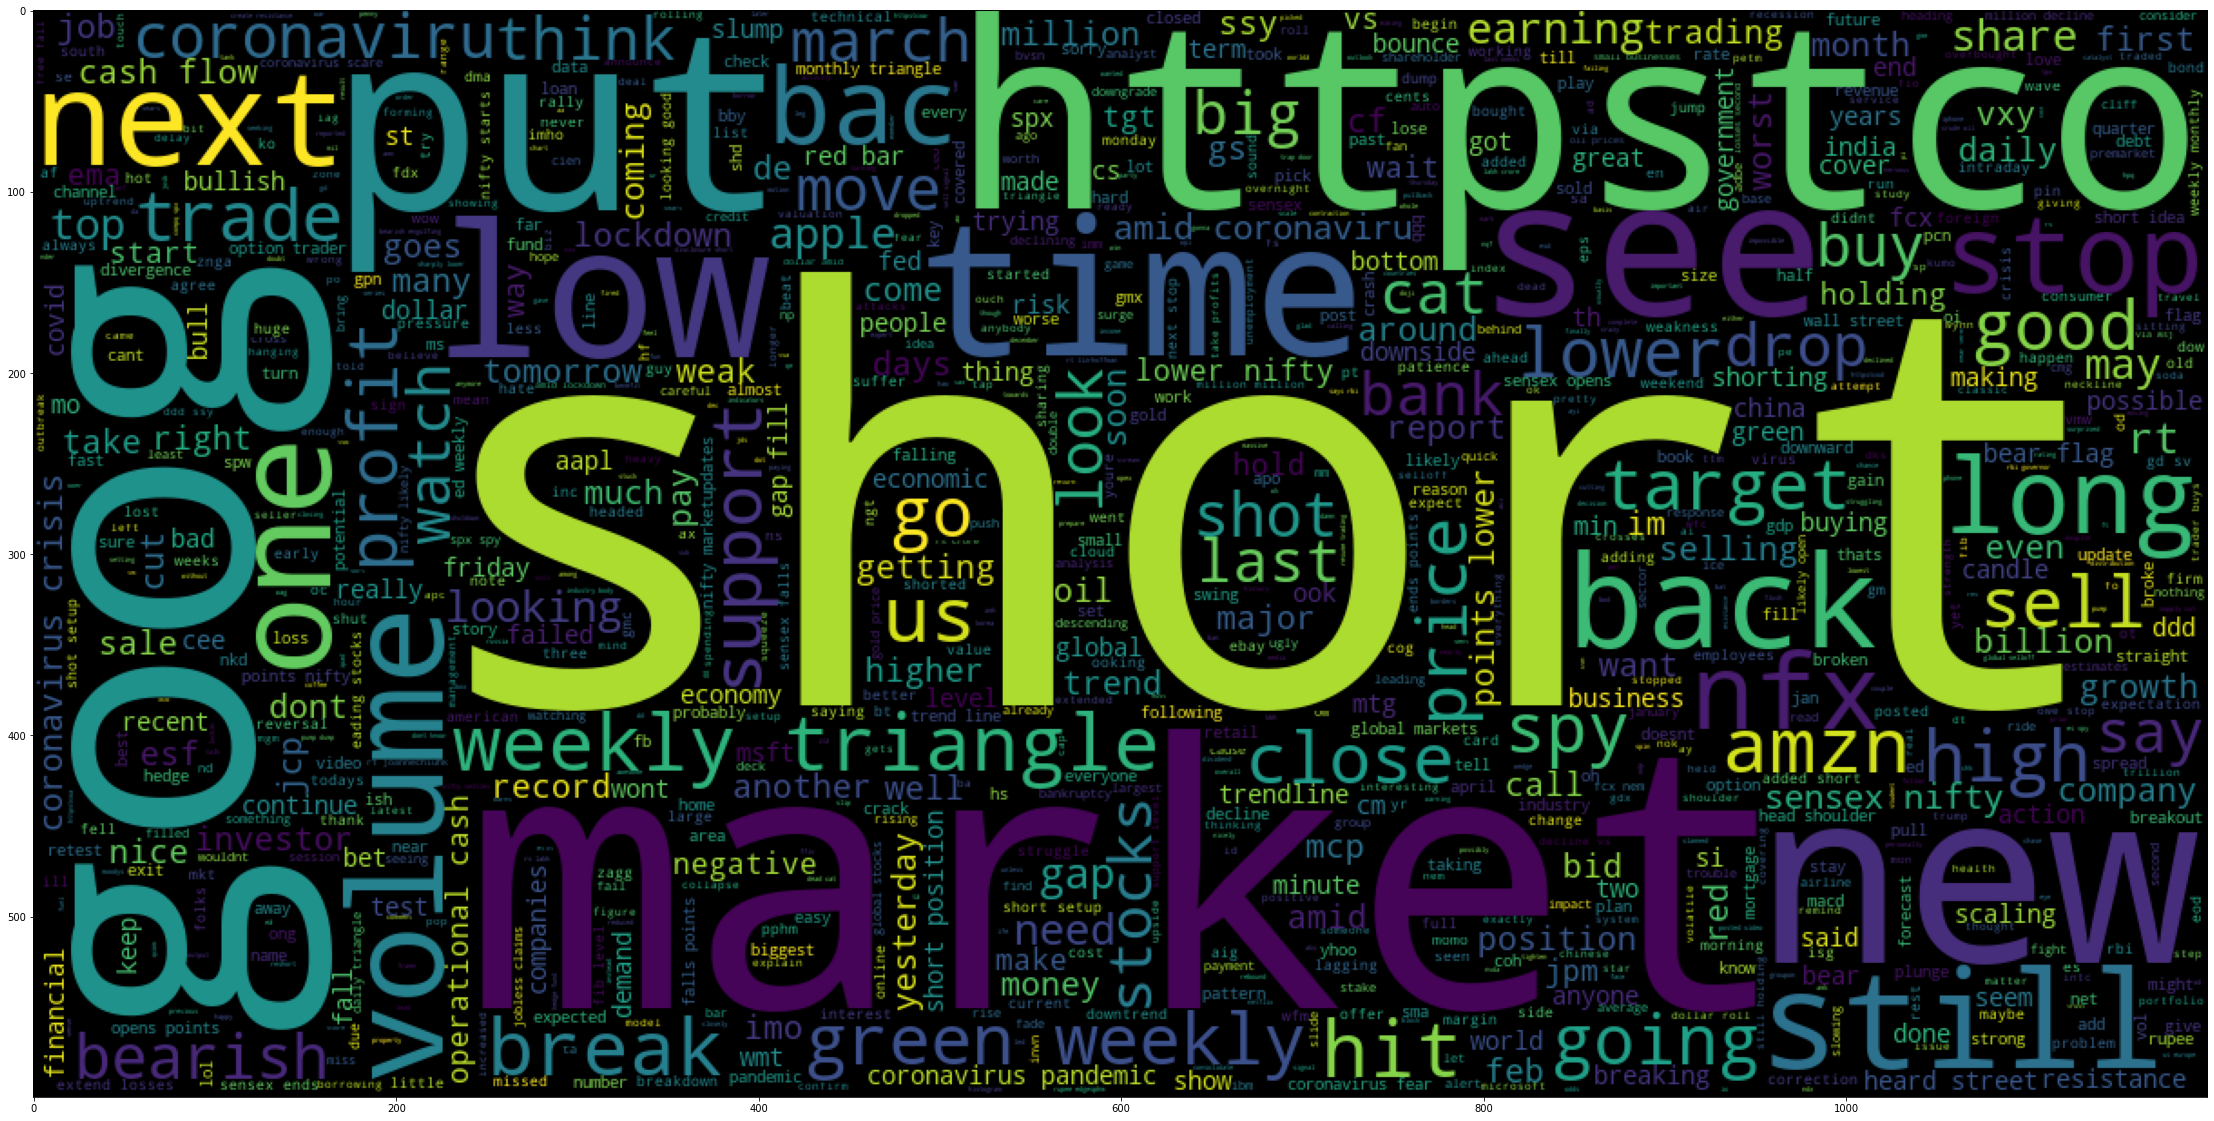

In [30]:
plt.figure(figsize=(40,20))
wc = WordCloud(max_words=1000, width = 1200, height = 600).generate(' '.join(stock_df.loc[stock_df['Sentiment'] == 0, 'Processesed_text_joined']))
plt.imshow(wc)

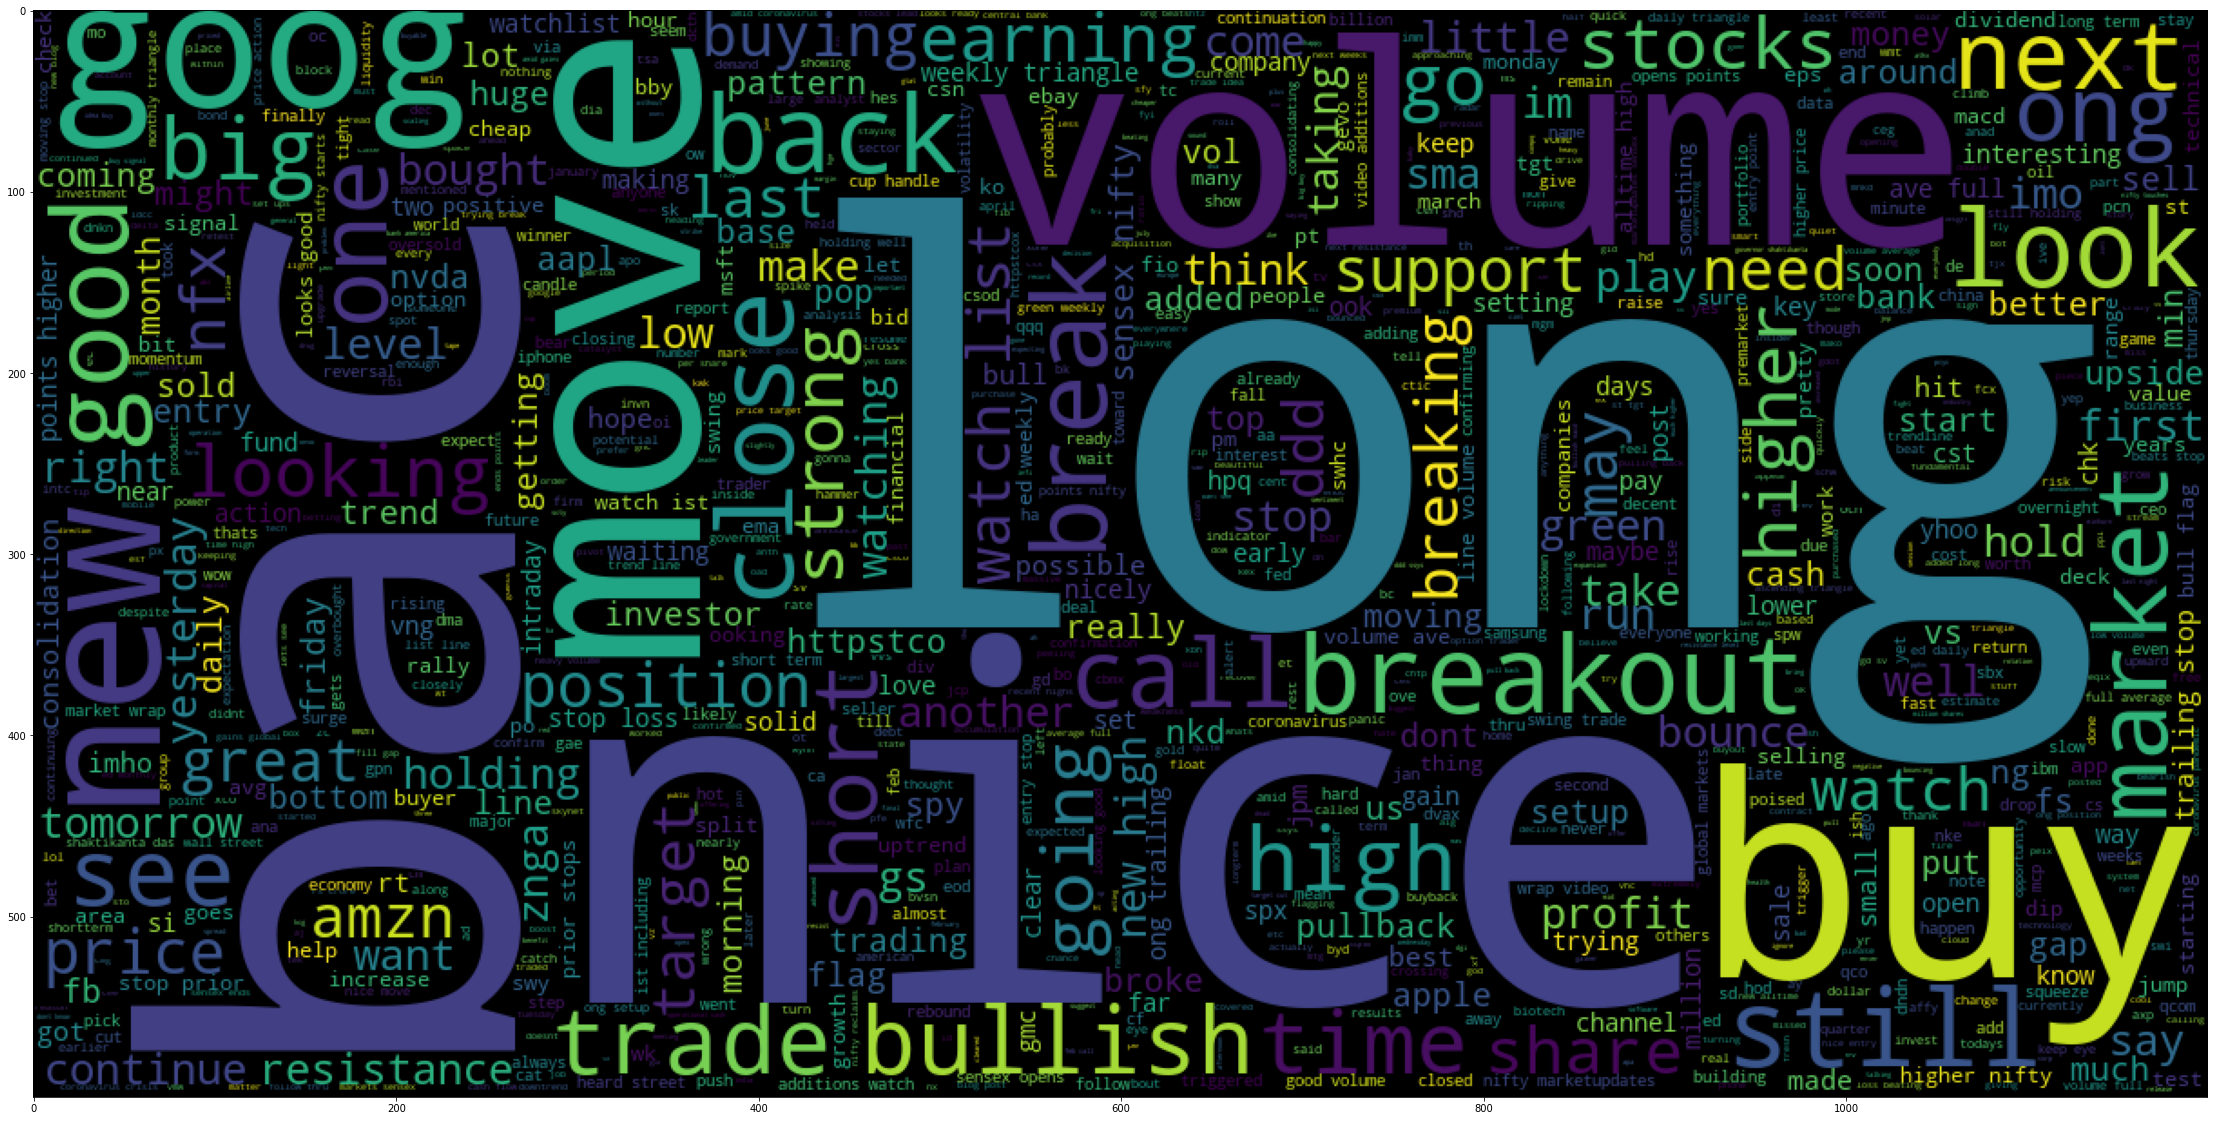

In [31]:
plt.figure(figsize=(40,20))
wc1 = WordCloud(max_words=1000, width = 1200, height = 600).generate(' '.join(stock_df.loc[stock_df['Sentiment'] == 1, 'Processesed_text_joined']))
plt.imshow(wc1)

Looks good now!

Next, let's use a word lemmatizer to reduce words to their base form 

In [32]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [33]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [35]:
lemmatizer = WordNetLemmatizer()

In [36]:
stock_df['Text_without_punc_sw_lemmatized'] = stock_df['Processesed_text_joined'].apply(lambda x: ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in x.split()]))

In [37]:
pstem = PorterStemmer()

In [38]:
stock_df['Text_without_punc_sw_stemmed'] = stock_df['Processesed_text_joined'].apply(lambda x: ' '.join([pstem.stem(word) for word in x.split()]))

In [39]:
stock_df.head(10)

Text  ...                       Text_without_punc_sw_stemmed
0  Kickers on my watchlist XIDE TIT SOQ PNK CPW B...  ...  kicker watchlist xide tit soq pnk cpw bpz aj t...
1  user: AAP MOVIE. 55% return for the FEA/GEED i...  ...               movi return feage indic trade awesom
2  user I'd be afraid to short AMZN - they are lo...  ...  id afraid short amzn look like nearmonopoli ebook
3                                  MNTA Over 12.00    ...                                               mnta
4                                   OI  Over 21.37    ...                                                 oi
5                                  PGNX  Over 3.04    ...                                               pgnx
6  AAP - user if so then the current downtrend wi...  ...  current downtrend break otherwis shortterm cor...
7  Monday's relative weakness. NYX WIN TIE TAP IC...  ...  monday rel weak nyx win tie tap ice int bmc ao...
8  GOOG - ower trend line channel test & volume s...  ...    goog ower trend line channel test volum support
9             AAP will watch tomorrow for ONG entry.  ...                           watch tomorrow ong entri

[10 rows x 7 columns]

The stemmed version seems to have produced a lot of meaningless words, so will stick to the lemmatized version for further analysis

In [40]:
freq = pd.Series(' '.join(stock_df['Text_without_punc_sw_lemmatized']).split()).value_counts()

In [41]:
freq.head()

short     498
high      395
look      324
go        316
volume    297
dtype: int64

In [42]:
freq[freq <= 3]

plug           3
pna            3
uk             3
human          3
count          3
              ..
confidence     1
tgh            1
knucklehead    1
vsb            1
ovqhafq        1
Length: 6342, dtype: int64

In [43]:
list_low_freq = list(freq[freq <= 3].index.values)

In [44]:
list_low_freq

['plug',
 'pna',
 'uk',
 'human',
 'count',
 'gdi',
 'content',
 'disaster',
 'certain',
 'mhk',
 'xmas',
 'adx',
 'cie',
 'sec',
 'delivery',
 'zero',
 'marketing',
 'union',
 'gp',
 'storm',
 'scar',
 'whisper',
 'promising',
 'hhc',
 'athn',
 'pauljdavies',
 'cr',
 'szym',
 'sps',
 'pool',
 'terrible',
 'highly',
 'innovate',
 'mexico',
 'expands',
 'symmetrical',
 'icici',
 'labor',
 'batter',
 'paid',
 'everyones',
 'ati',
 'debate',
 'twi',
 'senior',
 'ndervalued',
 'mild',
 'ignorance',
 'macro',
 'stall',
 'benchmark',
 'quote',
 'goodbye',
 'hr',
 'yday',
 'ftw',
 'echo',
 'experience',
 'unbelievable',
 'httpstcor',
 'iv',
 'spencerjakab',
 'msg',
 'fallout',
 'ridiculous',
 'omx',
 'hdfc',
 'heart',
 'speech',
 'pxd',
 'tade',
 'accurate',
 'zynga',
 'vote',
 'ipx',
 'textbook',
 'ackman',
 'youve',
 'otherwise',
 'warren',
 'sleep',
 'comin',
 'complaint',
 'champ',
 'fails',
 'ptrend',
 'employment',
 'main',
 'machine',
 'ob',
 'cpb',
 'dig',
 'complex',
 'dakt',
 'peabo

In [45]:
stock_df['Text_without_punc_sw_lemmatized'] = stock_df['Text_without_punc_sw_lemmatized'].apply(lambda x: ' '.join([word for word in x.split() if word not in (list_low_freq)]))

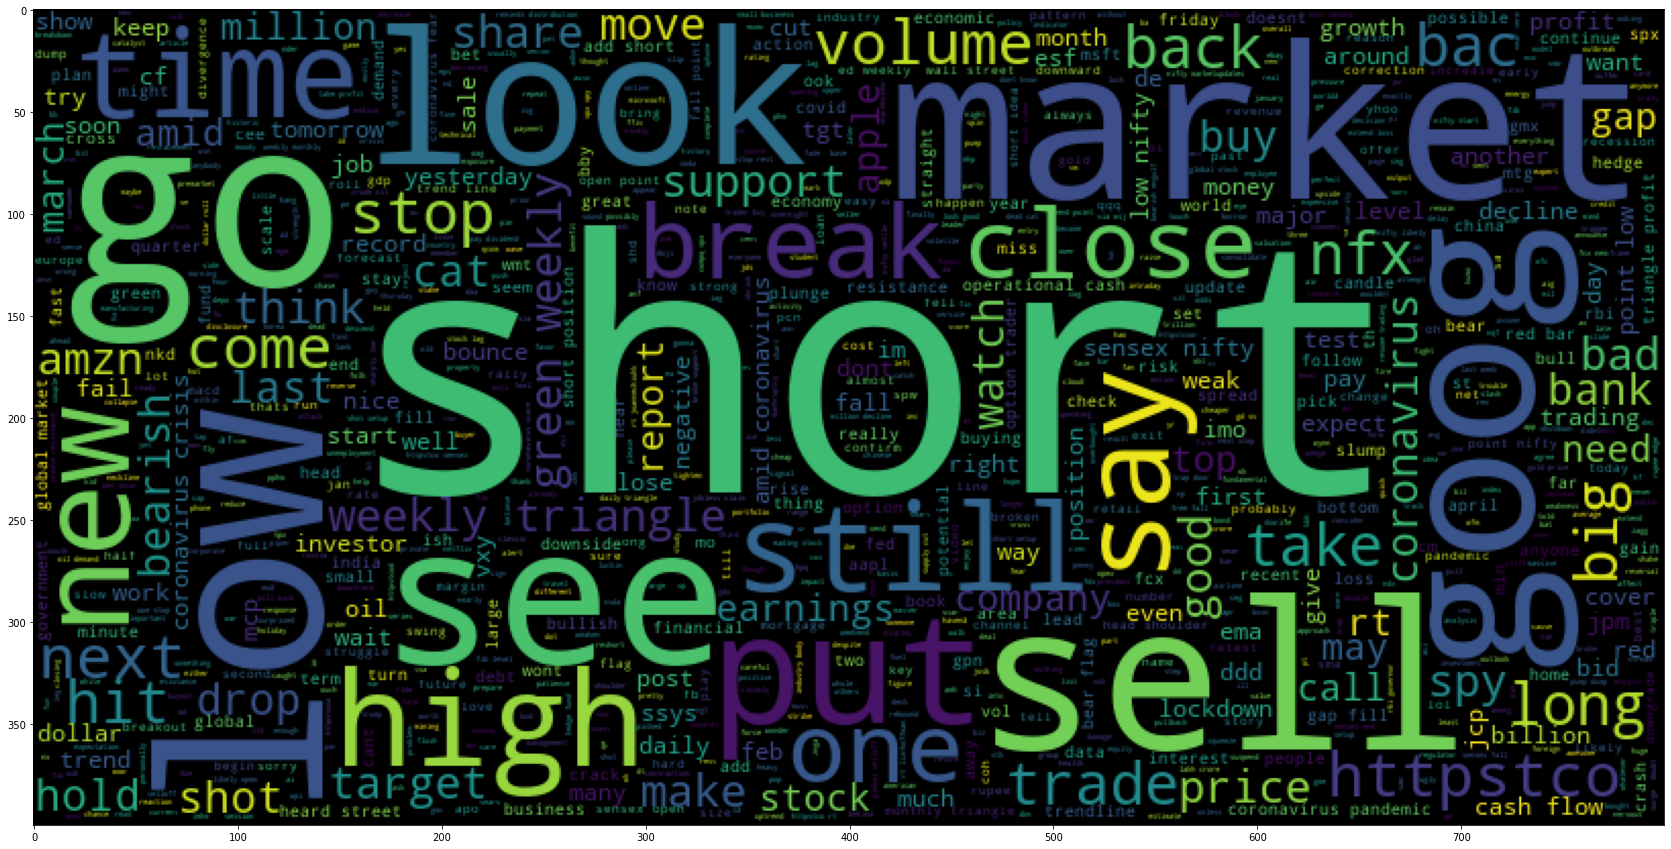

In [46]:
plt.figure(figsize=(30,15))
wc = WordCloud(max_words=1000, width = 800, height = 400).generate(' '.join(stock_df.loc[stock_df['Sentiment'] == 0, 'Text_without_punc_sw_lemmatized']))
plt.imshow(wc)

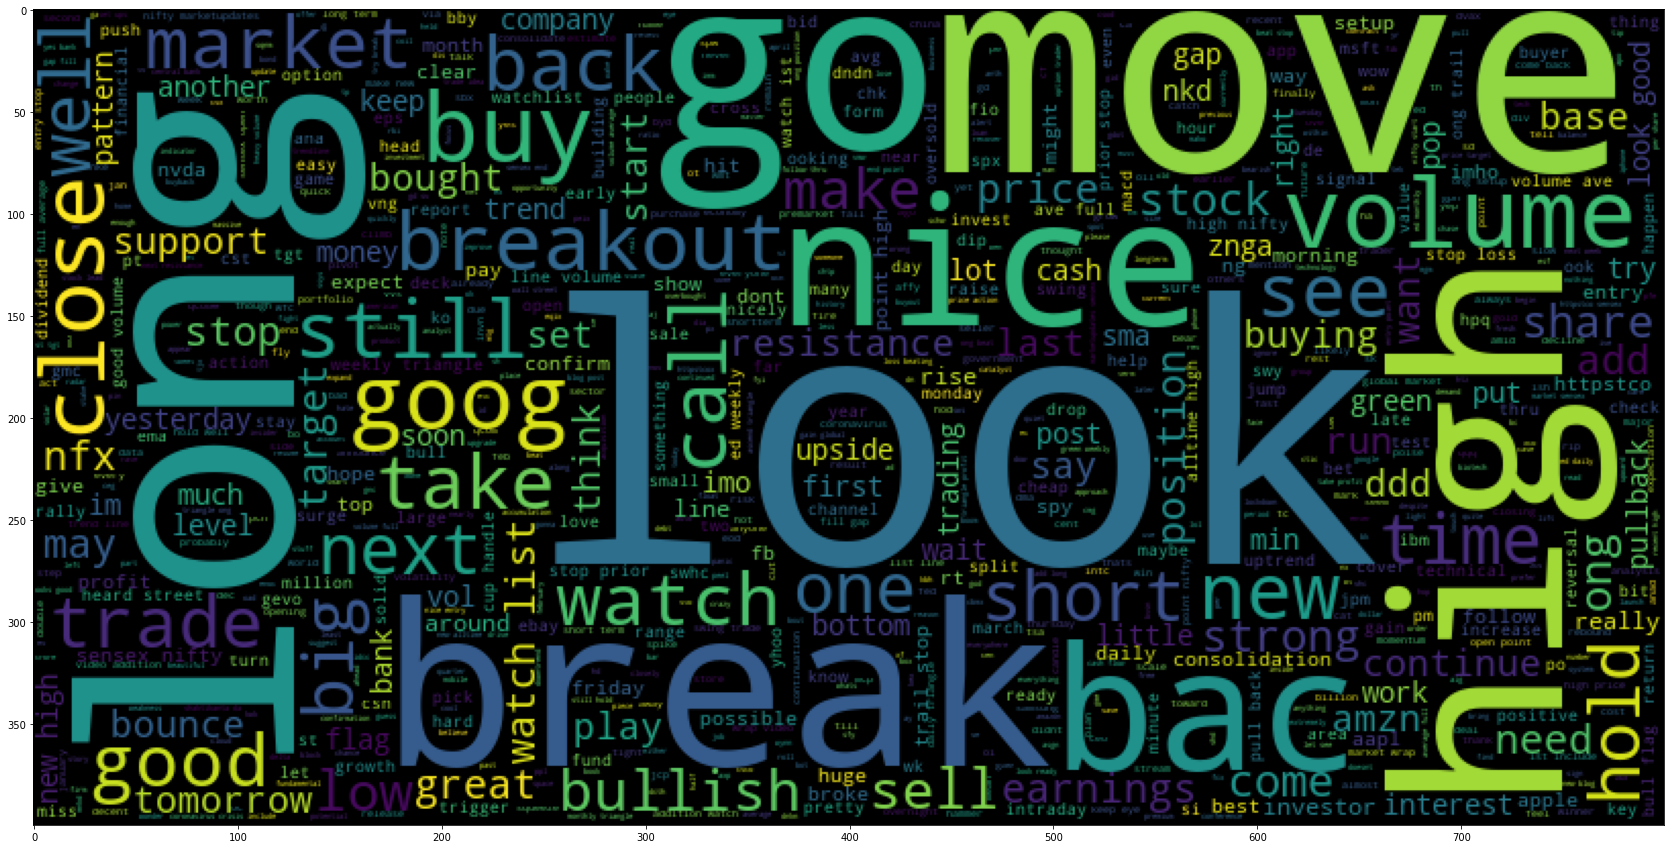

In [47]:
plt.figure(figsize=(30,15))
wc1 = WordCloud(max_words=1000, width = 800, height = 400).generate(' '.join(stock_df.loc[stock_df['Sentiment'] == 1, 'Text_without_punc_sw_lemmatized']))
plt.imshow(wc1)


# TOKENIZATION

In [48]:
stock_df.head()

Text  ...                       Text_without_punc_sw_stemmed
0  Kickers on my watchlist XIDE TIT SOQ PNK CPW B...  ...  kicker watchlist xide tit soq pnk cpw bpz aj t...
1  user: AAP MOVIE. 55% return for the FEA/GEED i...  ...               movi return feage indic trade awesom
2  user I'd be afraid to short AMZN - they are lo...  ...  id afraid short amzn look like nearmonopoli ebook
3                                  MNTA Over 12.00    ...                                               mnta
4                                   OI  Over 21.37    ...                                                 oi

[5 rows x 7 columns]

In [49]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
nltk.word_tokenize(stock_df['Text_without_punc_sw_stemmed'][0])

['kicker',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'aj',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'post']

In [51]:
# Obtain the maximum length of data in the document
# This will be later used when word embeddings are generated
maxlen = stock_df['Text_without_punc_sw_lemmatized'].apply(nltk.word_tokenize).apply(len).max()
print(f"The maximum number of words in any document is: {maxlen}")

The maximum number of words in any document is: 20


In [52]:
stock_df['Processesed_text_joined'].apply(nltk.word_tokenize).apply(len).max()

22

In [53]:
length_list = stock_df['Text_without_punc_sw_lemmatized'].apply(nltk.word_tokenize).apply(len)
px.histogram(x = length_list, nbins = 50)

# PREPARE THE DATA BY TOKENIZING AND PADDING

In [54]:
vocab_size = 10000
embedding_dim = 25
max_length = 20
trunc_type='post'
oov_tok = "<OOV>"

In [55]:
# split the data into test and train 
# split the data into test and train 
X = stock_df['Text_without_punc_sw_lemmatized']
y = stock_df['Sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = SEED)

In [56]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

# Training data
train_sequences = tokenizer.texts_to_sequences(X_train)

# Testing data
test_sequences = tokenizer.texts_to_sequences(X_test)

In [57]:
print("The encoding for document\n", X_train[1:2],"\n is: ", train_sequences[1])

The encoding for document
 3545    small weekly put position nfx
Name: Text_without_punc_sw_lemmatized, dtype: object 
 is:  [161, 45, 59, 51, 54]


In [58]:
# Add padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen = max_length, truncating = trunc_type, padding = 'post')
padded_test = pad_sequences(test_sequences, maxlen = max_length, truncating = trunc_type, padding = 'post')

In [59]:
for i, doc in enumerate(padded_train[:3]):
     print("The padded encoding for document:", i+1," is:", doc)

The padded encoding for document: 1  is: [ 213 1113  160  441   25   67  111    0    0    0    0    0    0    0
    0    0    0    0    0    0]
The padded encoding for document: 2  is: [161  45  59  51  54   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
The padded encoding for document: 3  is: [ 162   44   13  197    4   26   18  132 1114    0    0    0    0    0
    0    0    0    0    0    0]


# USING A SIMPLE DEEP NEURAL NET WITH ONLY CONV AND DENSE LAYERS

In [60]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(input_dim = vocab_size, 
                                                       output_dim = embedding_dim, input_length = max_length),
                             tf.keras.layers.Conv1D(128,5,activation='relu'),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(32, activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')])

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 25)            250000    
_________________________________________________________________
conv1d (Conv1D)              (None, 16, 128)           16128     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 270,289
Trainable params: 270,289
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
# train the model
model.fit(padded_train, y_train, batch_size = 32, validation_split = 0.2, epochs = 5)

Epoch 1/5
131/131 [==============================] - 2s 11ms/step - loss: 0.6587 - accuracy: 0.6320 - val_loss: 0.5770 - val_accuracy: 0.6999
Epoch 2/5
131/131 [==============================] - 1s 7ms/step - loss: 0.4858 - accuracy: 0.7769 - val_loss: 0.4866 - val_accuracy: 0.7728
Epoch 3/5
131/131 [==============================] - 1s 7ms/step - loss: 0.3621 - accuracy: 0.8493 - val_loss: 0.5021 - val_accuracy: 0.7785
Epoch 4/5
131/131 [==============================] - 1s 7ms/step - loss: 0.2949 - accuracy: 0.8897 - val_loss: 0.5312 - val_accuracy: 0.7747
Epoch 5/5
131/131 [==============================] - 1s 7ms/step - loss: 0.2598 - accuracy: 0.9016 - val_loss: 0.5874 - val_accuracy: 0.7699


# TRAINING WITH A SEQUENCE MODEL (LSTM)

In [64]:
# Sequential Model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 25)            250025    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                14848     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 265,270
Trainable params: 265,270
Non-trainable params: 0
_________________________________________________________________


In [65]:
# train the model
model.fit(padded_train, y_train, batch_size = 32, validation_split = 0.2, epochs = 5)

Epoch 1/5
131/131 [==============================] - 6s 23ms/step - loss: 0.6585 - accuracy: 0.6325 - val_loss: 0.5414 - val_accuracy: 0.7315
Epoch 2/5
131/131 [==============================] - 2s 16ms/step - loss: 0.4392 - accuracy: 0.8100 - val_loss: 0.4718 - val_accuracy: 0.7785
Epoch 3/5
131/131 [==============================] - 2s 17ms/step - loss: 0.3281 - accuracy: 0.8694 - val_loss: 0.4866 - val_accuracy: 0.7718
Epoch 4/5
131/131 [==============================] - 2s 17ms/step - loss: 0.2591 - accuracy: 0.9088 - val_loss: 0.5346 - val_accuracy: 0.7747
Epoch 5/5
131/131 [==============================] - 2s 17ms/step - loss: 0.2413 - accuracy: 0.9137 - val_loss: 0.5427 - val_accuracy: 0.7718


### Let's use a slightly more sophisticated model to prevent overfitting

In [66]:
embedding_dimension = 100
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dimension, input_length=max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 100)           1000100   
_________________________________________________________________
dropout (Dropout)            (None, 20, 100)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 16, 64)            32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4, 64)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,044,613
Trainable params: 1,044,613
Non-trainable params: 0
____________________________________________

In [67]:
# train the model
model.fit(padded_train, y_train, batch_size = 32, validation_split = 0.2, epochs = 3)

Epoch 1/3
131/131 [==============================] - 5s 20ms/step - loss: 0.6533 - accuracy: 0.6388 - val_loss: 0.5064 - val_accuracy: 0.7498
Epoch 2/3
131/131 [==============================] - 2s 16ms/step - loss: 0.4193 - accuracy: 0.8126 - val_loss: 0.4608 - val_accuracy: 0.7795
Epoch 3/3
131/131 [==============================] - 2s 15ms/step - loss: 0.3025 - accuracy: 0.8810 - val_loss: 0.5011 - val_accuracy: 0.7776


# ASSESS TRAINED MODEL PERFORMANCE

In [68]:
# make prediction
pred = model.predict(padded_test)

In [69]:
pred.shape

(580, 1)

In [70]:
# make prediction
prediction = [1 if i[0]>0.5 else 0 for i in pred]

In [71]:
prediction[:5]

[1, 1, 1, 1, 1]

In [72]:
y_test[:5]

1539    1
2156    1
2661    1
136     1
70      1
Name: Sentiment, dtype: int64

In [73]:
# acuracy score on text data
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)
accuracy

0.7551724137931034

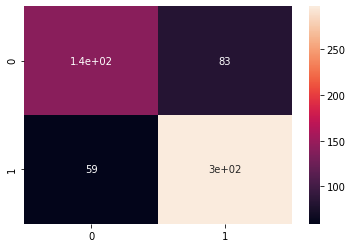

In [74]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
sns.heatmap(cm, annot = True)